# Research on apartment sale listings

In [61]:
# importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt


## General information about data

In [62]:
data = pd.read_csv('/Users/ira-bobrineva/Downloads/real_estate_data.csv')
print(data.head(10))

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

The data is merged. It needs to be processed and placed into a table.

In [63]:
data = pd.read_csv('/Users/ira-bobrineva/Downloads/real_estate_data.csv', sep='\t')

print(data.head(10))                   

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [64]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Preliminary analysis: the data contains null values, not all data types are consistent with the data itself (e.g., is_apartment should be of boolean type), the name cityCenters_nearest needs to be corrected.

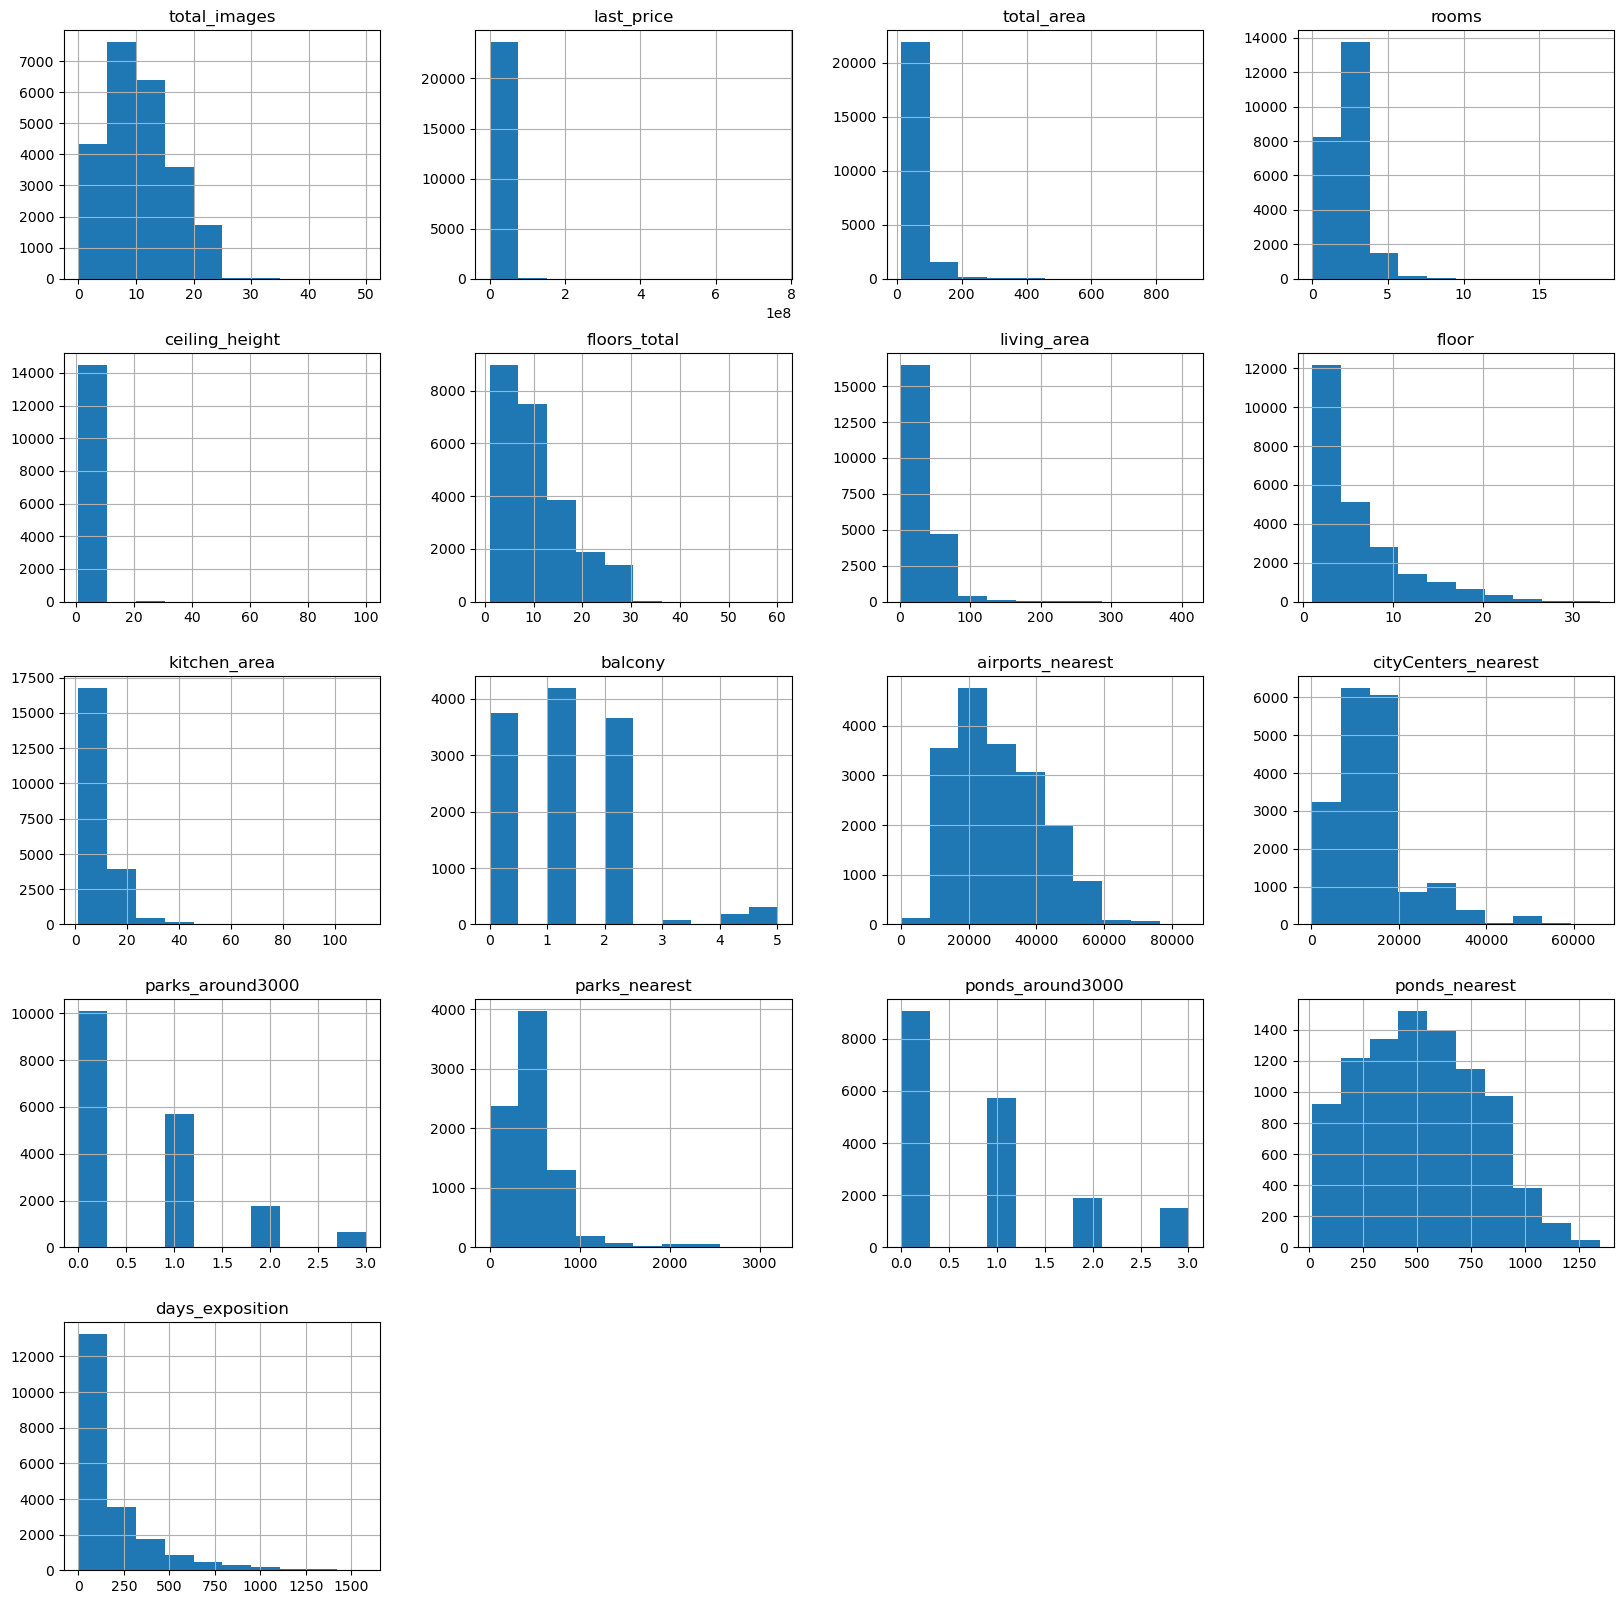

In [65]:
data.hist(figsize=(20, 20)) # building histograms for numerical values to study the data once more
plt.show()

**Conclusions based on the graphs**

- Usually, up to 15 photos are attached to the listing, sometimes up to 25, and more than that is quite rare.
- The majority of apartments are priced below 100,000,000. Further detailed analysis of prices is needed.
- The standard total area is less than 100 m². There are a few apartments that are larger, but those over 200 m² are very rare.
- There are many studios, one-bedroom, two-bedroom, and three-bedroom apartments. Apartments with more rooms are much less common.
- The ceiling height data is a bit strange: there are outlier values greater than 20 m. This column needs to be processed. Typically, ceiling heights are up to 10 m, but even this value seems strange. Further investigation is needed.
- Many buildings have up to 10 floors, and the values decrease after that.
- The living area is usually up to 50 m².
- Many apartments are located below the 6th floor.
- The kitchen area is usually less than 15 m².
- Apartments typically have 0 to 2 balconies. 3 or more balconies are rare.
- Some apartments are very far from airports, but most are within 40 km of the nearest airport.
- Most apartments are located within a 20 km radius of the city center.
- Many apartments have no parks or bodies of water within a 3 km radius, sometimes there is 1 park or body of water, and more parks are even rarer.
- Usually, parks and bodies of water are located within a 1 km radius of the apartment.
- Many apartments were sold in less than six months, but some were listed for more than two years.


## Preprocessing

### Handling missing values

In [66]:
data.isna().sum() # displaying the number of zero values in each column

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Missing values are present in the following columns: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

How to fill in the missing values:
* ceiling_height - Ceiling height is rarely specified in listings; it's not the most important metric. Missing values can be replaced with the median for all apartments because ceiling height is generally standard.
* floors_total - There are few missing values, so I would simply delete the rows with missing values.
* living_area - This is bad if not specified, as it's an important parameter. It cannot be logically filled. Leaving the missing values.
* is_apartment - Some owners might have simply not marked that they don't have an apartment. Missing values can be replaced with False.
* kitchen_area - Cannot be logically filled. Leaving the missing values.
* balcony - The owner might not have specified the number of balconies because there are none in the apartment. Missing values can be replaced with 0.
* locality_name - There are few missing values, so I would simply delete these rows.
* airports_nearest - Missing values are filled automatically; cannot be logically restored. Leaving the missing values.
* cityCenters_nearest - Missing values are filled automatically; cannot be logically restored. Leaving the missing values.
* parks_around3000 - Not every place has parks nearby; missing values can be replaced with 0.
* parks_nearest - Missing values are filled automatically; cannot be logically restored. Leaving the missing values.
* ponds_around3000 - Not every place has ponds nearby; missing values can be replaced with 0.
* ponds_nearest - Missing values are filled automatically; cannot be logically restored. Leaving the missing values.
* days_exposition - Missing values are filled automatically; cannot be logically restored. Leaving the missing values.

In [67]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # filling in ceiling height

data['is_apartment'] = data['is_apartment'].fillna(False) # filling in missing values with False
data['balcony'] = data['balcony'].fillna(0)

data = data.dropna(subset=['floors_total', 'locality_name']) # deleting rows without floor and locality information

data['parks_around3000'] = data['parks_around3000'].fillna(0) # filling in missing values with 0

data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # filling in missing values with 0

data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) # correcting the column name syntax

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Changing data types

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

Data types need to be changed for the following integer values: floors_total (float64), balcony (float64), parks_around3000 (float64), ponds_around3000 (float64).

In [69]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony              

### Removing implicit duplicates

In [70]:
data['locality_name'].unique() # examining all unique values in the column

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [71]:
# counting the total number of values before processing

len(data['locality_name'].value_counts())


364

There are no complete duplicates at all, but there are a few implicit duplicates. I will remove them.

In [72]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('поселок', 'посёлок')
    .replace('посёлок городского типа Рябово', 'посёлок Рябово')
    .str.replace('посёлок городского типа', 'городской посёлок')
    .replace('посёлок Мурино', 'Мурино')
    .replace('деревня Кудрово', 'Кудрово')
    .replace('коттеджный посёлок Лесное', 'посёлок Лесное')
    .replace('посёлок станции Приветнинское', 'посёлок при железнодорожной станции Приветнинское')
    .replace('посёлок станции Вещево', 'посёлок при железнодорожной станции Вещево')
    .replace('деревня Фёдоровское', 'городской посёлок Фёдоровское')
    .replace('садовое товарищество Приладожский', 'городской посёлок Приладожский')
    .replace('Никольское', 'село Никольское')
    .replace('городской посёлок Павлово', 'село Павлово')
)

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'городской посёлок Красный Бор', 'Гатчина',
       'городской посёлок Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'городской посёлок Лебяжье', 'городской посёлок Сиверский',
       'посёлок Молодцово', 'городской посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'городской посёлок Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Иванг

In [73]:
# counting the number of values after processing

len(data['locality_name'].value_counts())

313

The main implicit duplicates occur due to the possibility of dual spelling. For example, "посёлок городского типа/городской посёлок" and "е/ё" - either spelling is possible, so people indicate different ones. To avoid implicit duplicates in the future, auto-completion of the locality name can be added.

### Adding new columns

In [74]:
data['price_for_m_2'] = (data['last_price'] / data['total_area']).round(2) # price per square meter
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday # day of publication
data['month_exposition'] = data['first_day_exposition'].dt.month # month of publication
data['year_exposition'] = data['first_day_exposition'].dt.year # year of publication

def categorize_floor(row): # function that calculates the floor type
    try:
        if row['floor'] == 1:
            return 'First'
        elif row['floor'] == row['floors_total']:
            return 'Last'
        else:
            return 'Another'
    except:
        pass
    
data['floor_category'] = data.apply(categorize_floor, axis=1)


data['city_center_km'] = (data['city_centers_nearest'] / 1000).round() # converting meters to kilometers for the distance to the city center

data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m_2,weekday_exposition,month_exposition,year_exposition,floor_category,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,Another,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,First,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,Another,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,Another,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,Another,8.0


## Exploratory data analysis

### Histograms by parameters

#### Total area

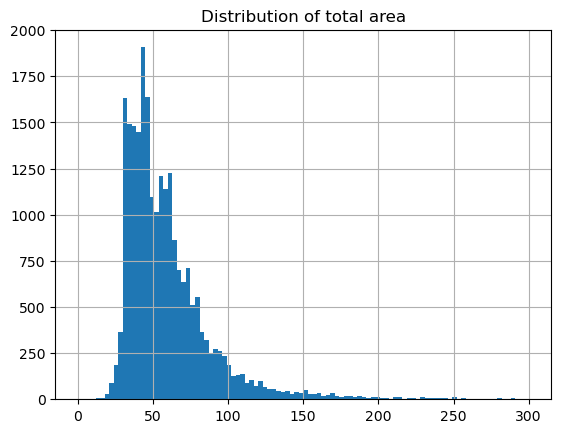

In [75]:
data = data.query('total_area <= 300') # limited the total area to 300 m² because there are not many data points beyond that

data['total_area'].hist(bins=100, range=(0, 300))

plt.title('Distribution of total area')

plt.show()


Most apartments sold have a total area of 30 to 50 m². There is also a spike around 60 m².

#### Living area

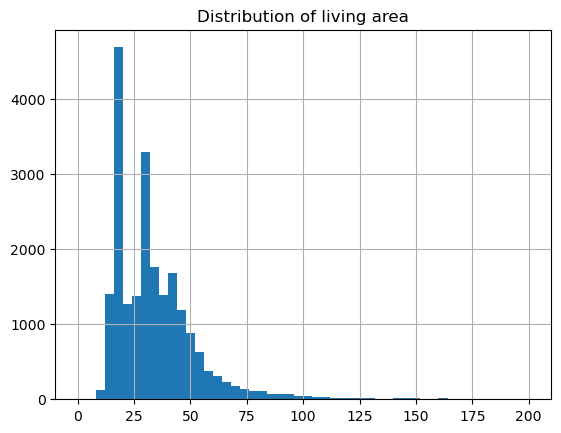

In [76]:
data = data.query('living_area <= 200') #limited the living area to 200 m² because there are not many data points beyond that

data['living_area'].hist(bins=50, range=(0, 200))

plt.title('Distribution of living area')

plt.show()

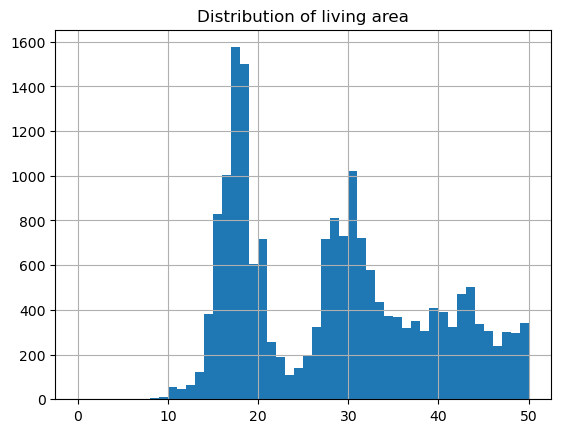

In [77]:
data['living_area'].hist(bins=50, range=(0, 50)) #further limit the histogram to better examine the most prominent values

plt.title('Distribution of living area')

plt.show()

Many apartments have a living area of 15-20 m², as well as 25-50 m².

#### Kitchen area

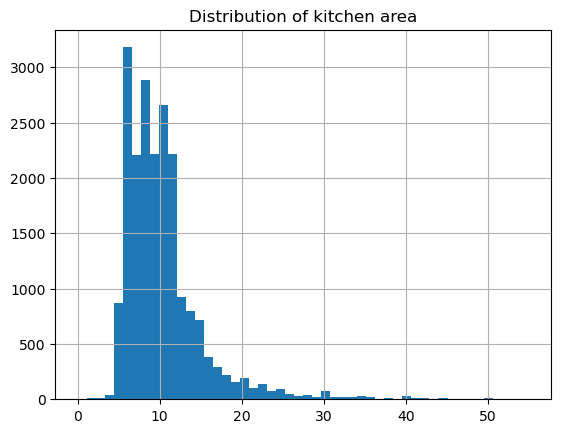

In [78]:
data = data.query('kitchen_area <= 55') # limit the kitchen area to 55 m² because there are not many data points beyond that

data['kitchen_area'].hist(bins=50, range=(0, 55))

plt.title('Distribution of kitchen area')

plt.show()

Typically, the kitchen area in sold apartments ranges from 5 to 15 m².

#### The price of the property

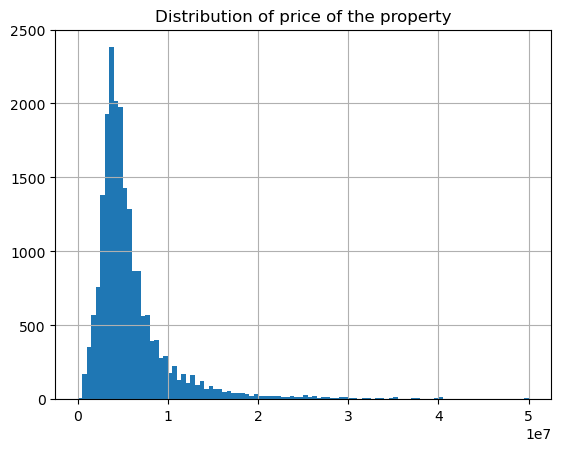

In [79]:
data = data.query('last_price <= 50000000') # limit the cost to 50 million because there isn't much data beyond that
data['last_price'].hist(bins=100, range=(0, 50000000))

plt.title('Distribution of price of the property')

plt.show()

Most often, apartments were sold for less than 10,000,000. Then I categorized the apartments by cost, and it became clearer that the majority of apartments cost less than 5,000,000.

#### Number of rooms

In [80]:
data['rooms'].unique() # looking at the overall values to understand how to limit the values for the histogram

array([ 3,  1,  2,  4,  5,  6, 11,  7,  8, 10,  9, 16, 14])

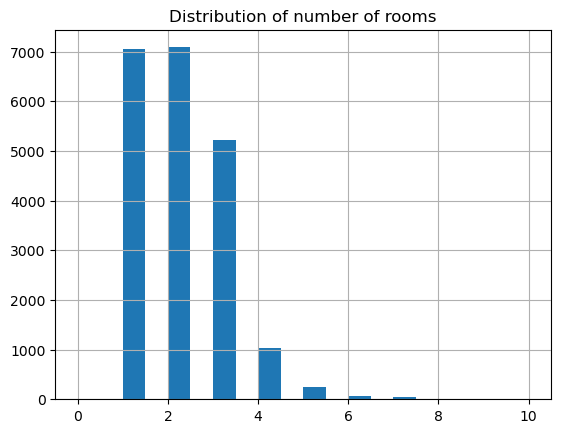

In [81]:
data = data.query('rooms <= 10') # since more than 10 rooms are rare, limiting the histogram to this value

data['rooms'].hist(bins=20, range=(0, 10))

plt.title('Distribution of number of rooms')

plt.show()


Most of the sales are one-room and two-room apartments. Studios can also be included in one-room apartments. There are also three-room apartments, but anything beyond that is much rarer.

#### Ceiling height

In [82]:
data['ceiling_height'].unique() # looking at the overall values

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,   4.  ,
         2.47,   2.84,   3.1 ,   3.4 ,   3.5 ,   2.72,   2.54,   2.51,
         2.78,   2.76,   2.58,   3.7 ,   2.52,   2.87,   2.66,   2.59,
         2.  ,   2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,
         3.55,   3.62,   2.53,   2.73,   2.96,   2.46,   2.74,   2.95,
         4.06,   2.94,   2.79,   3.54,   3.53,   2.83,   2.4 ,   3.38,
         3.01,   3.65,   3.18,   2.71,   3.35,   2.3 ,   3.57,   2.48,
         2.62,   2.82,   3.98,   3.12,   2.63,   3.83,   3.52,   3.95,
         3.75,   2.88,   3.67,   3.87,   3.66,   4.19,   3.24,   4.8 ,
         4.5 ,   4.2 ,   3.36,   3.86,  32.  ,   3.68,   3.07,   3.37,
         3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,
         3.14,   4.37,   2.68,   3.9 ,   3.22,   3.27,  25.  ,   2.93,
      

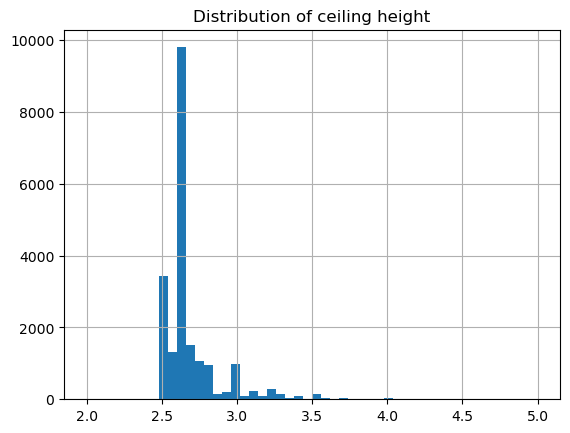

In [83]:
data['ceiling_height'] = data['ceiling_height'].replace({25: 2.5, 100: 1, 32: 3.2, 27: 2.7, 24: 2.4, 26: 2.6, 14: 1.4, 20: 2, 22.6: 2.26, 10.3: 1.03, 27.5: 2.75}) # correcting anomalies
data = data.query('2 <= ceiling_height < 5') # on average, ceiling heights are no less than 2 meters and no more than 5 meters, limiting the histogram to these values.
data['ceiling_height'].hist(bins=50, range=(2, 5))

plt.title('Distribution of ceiling height')

plt.show()

Most apartments have ceiling heights between 2.5 and 3 meters. Ceilings higher than 3 meters may indicate the presence of pre-revolutionary apartments.

#### Type of apartment floor

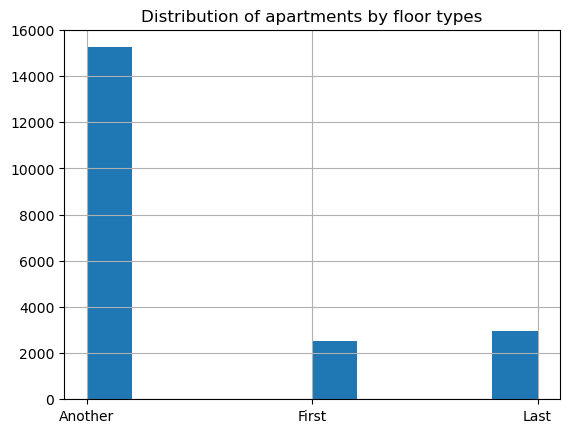

In [84]:
data['floor_category'].hist() # histogram of the distribution of apartments by floor types

plt.title('Distribution of apartments by floor types')

plt.show()

Predictably, standard apartments are not on the first or last floor.

#### Total number of floors in the building

In [85]:
data['floors_total'].unique() # studying the floor values to understand how to set the limits

array([16, 11,  5, 14, 12, 26, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4, 24,
        8,  2, 10,  7, 15, 22, 13, 20, 28, 36, 21, 35, 60,  1, 29, 33, 52])

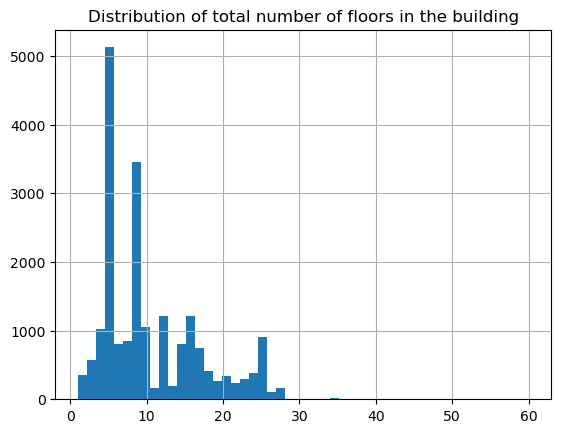

In [86]:
data['floors_total'].hist(bins=50) # histogram with 50 bins without limitations, because all floors are important, all floors are needed

plt.title('Distribution of total number of floors in the building')

plt.show()

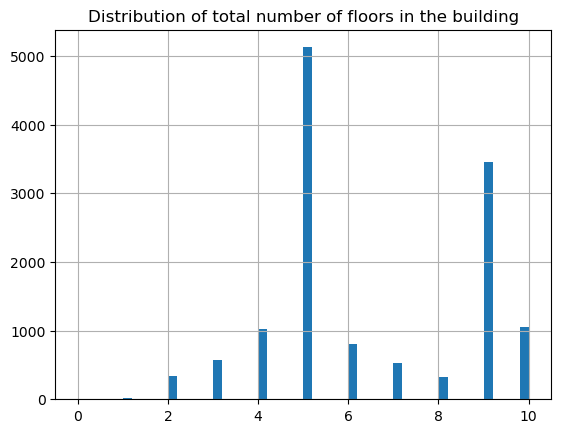

In [87]:
data['floors_total'].hist(bins=50, range=(0, 10)) # closer look at the standout values

plt.title('Distribution of total number of floors in the building')

plt.show()

Most apartments are sold in buildings with 10 floors. Five-story and nine-story buildings are also leading. Outliers indicate many standard-design buildings.

#### Distance to the city center in meters

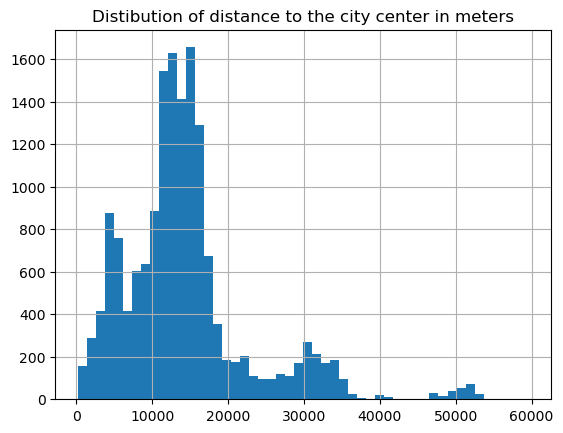

In [88]:
data = data.query('city_centers_nearest < 60000') # limit the value to 60 km because there isn't much data beyond that

data['city_centers_nearest'].hist(bins=50)

plt.title('Distibution of distance to the city center in meters')

plt.show()

Most apartments are within a 15 km radius from the city center.

#### Distance to the nearest park

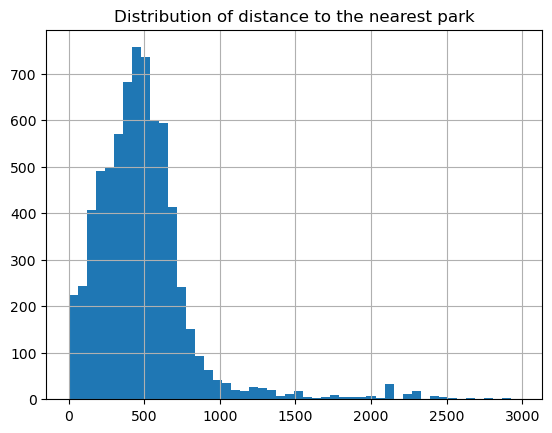

In [89]:
data = data.query('parks_nearest <= 3000') # limit the value to 3 km because there isn't much data beyond that

data['parks_nearest'].hist(bins=50)

plt.title('Distribution of distance to the nearest park')

plt.show()


Most apartments are located within a 5 km radius from the nearest park.

### Speed of apartment sales

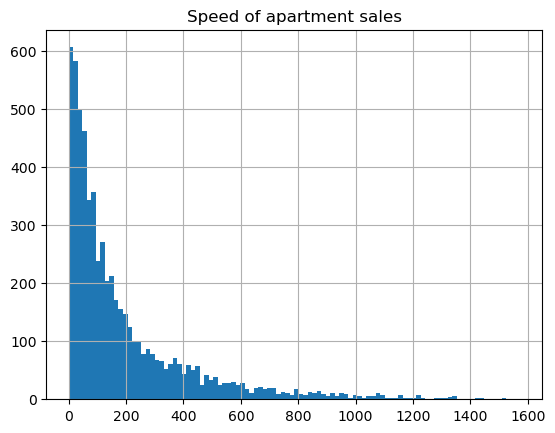

The average is 195.38554809110275, the median is 108.0


In [90]:
data['days_exposition'].hist(bins=100) # displaying an overall graph of the speed of apartment sales
plt.title('Speed of apartment sales')

plt.show()

# calculating the average and median speed
print(f"The average is {data['days_exposition'].mean()}, the median is {data['days_exposition'].median()}")

Typically, selling an apartment takes about 4 to 6 months. Some sales can extend to a year. Unusually long sales take more than two years.

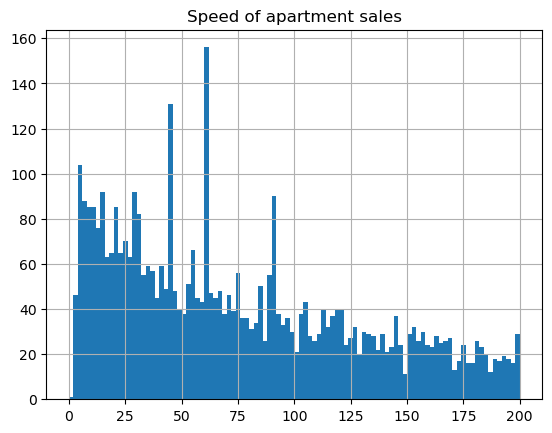

1.0

In [91]:
# closer look at the histogram and find the fastest values
data['days_exposition'].hist(bins=100, range=(0, 200))
plt.title('Speed of apartment sales')
plt.show()
data['days_exposition'].min()

Fast sales were completed in less than a month. Most apartments were sold in two months. Some apartments may sell below market price, so they go faster. If the price is too high, the apartment may remain unsold for a long time. Renovation and location also work in favor of the sellers.

### Factors that affect the cost of an apartment

#### Correlation between price and total area

In [92]:
# writing a function that categorizes prices, applying it to the price column, and adding a new column with categories

def categorize_price(price):
    try:
        if 0 <= price <= 5000000:
            return 'E'
        elif 5000001 <= price <= 10000000:
            return 'D'
        elif 10000001 <= price <= 15000000:
            return 'C'
        elif 15000001 <= price <= 25000000:
            return 'B'
        elif price >= 25000001:
            return 'A'
    except:
        pass

data['last_price_category'] = data['last_price'].apply(categorize_price)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m_2,weekday_exposition,month_exposition,year_exposition,floor_category,city_center_km,last_price_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.37,3,3,2019,Another,16.0,C
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.71,3,8,2015,Another,14.0,D
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.00,1,6,2018,Another,8.0,D
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2,553.0,137.0,127525.25,3,11,2017,Another,14.0,D
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,3,298.0,366.0,82943.93,5,7,2017,Last,33.0,E


In [93]:
# building a pivot table with price categories, the number of apartments in each category, and the median total area for each group
# just interested in seeing the overall correlation
price_vs_total_area = data.pivot_table(index='last_price_category', values='total_area', aggfunc=['count', 'median'])
price_vs_total_area.columns = ['Total number of apartments', 'Median total area']
price_vs_total_area.sort_values(by='Total number of apartments', ascending=False)


,Total number of apartments,Median total area
last_price_category,,
D,2905,63.00
E,2821,41.80
C,779,94.11
B,431,119.00
A,183,143.00


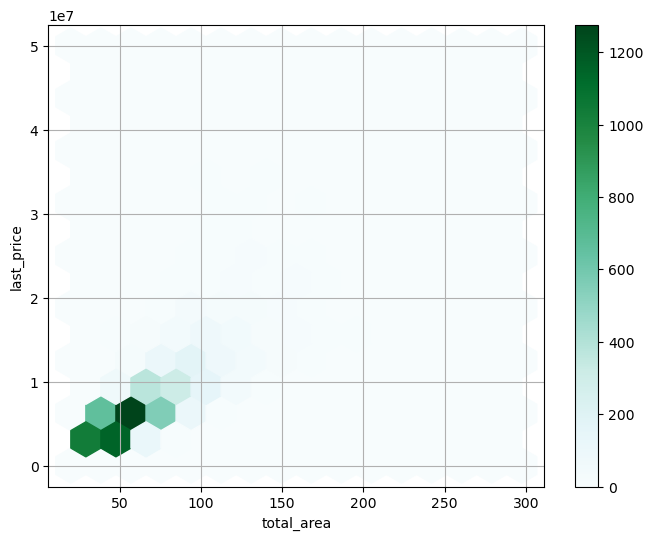

In [94]:
# building a graph to show the correlation between total area and apartment price

data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [95]:
# looking at the Pearson correlation coefficient

data['total_area'].corr(data['last_price'])

0.7874295802438263

Overall, it turns out that the larger the total area, the higher the cost of the apartment.

#### Correlation between price and living area

In [96]:
# building a pivot table with price categories, the number of apartments in each category, and the median living area for each group

price_vs_living_area = data.pivot_table(index='last_price_category', values='living_area', aggfunc=['count', 'median'])
price_vs_living_area.columns = ['Total number of apartments', 'Median living area']
price_vs_living_area.sort_values(by='Total number of apartments', ascending=False)

,Total number of apartments,Median living area
last_price_category,,
D,2905,37.0
E,2821,20.4
C,779,53.5
B,431,67.0
A,183,80.2


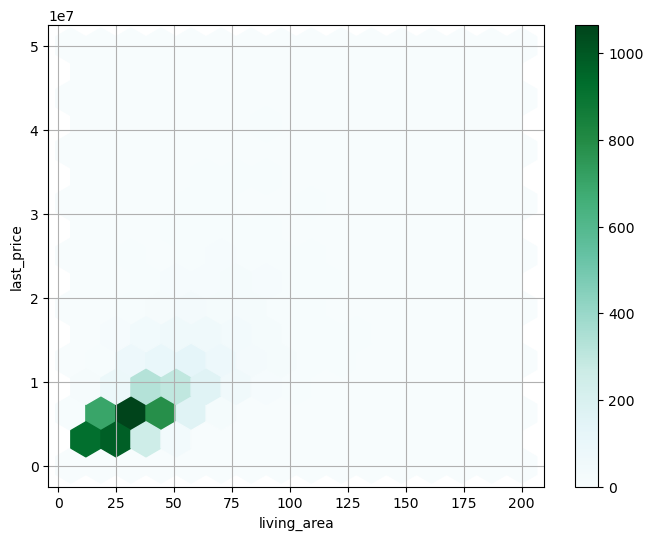

In [97]:
# building a graph to show the correlation between living area and apartment price

data.plot(x='living_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True) 
plt.show()

In [98]:
# looking at the Pearson correlation coefficient

data['living_area'].corr(data['last_price'])

0.6937807532423991

The cost of an apartment depends slightly less on the size of the living area, but the relationship is still quite strong. The larger the living area, the more expensive the apartment.

#### Correlation between price and kitchen area

In [99]:
# building a pivot table with price categories, the number of apartments in each category, and the median kitchen area for each group

price_vs_kitchen_area = data.pivot_table(index='last_price_category', values='kitchen_area', aggfunc=['count', 'median'])
price_vs_kitchen_area.columns = ['Total number of apartments', 'Median kitchen area']
price_vs_kitchen_area.sort_values(by='Total number of apartments', ascending=False)

,Total number of apartments,Median kitchen area
last_price_category,,
D,2905,10.00
E,2821,7.00
C,779,14.20
B,431,17.10
A,183,19.35


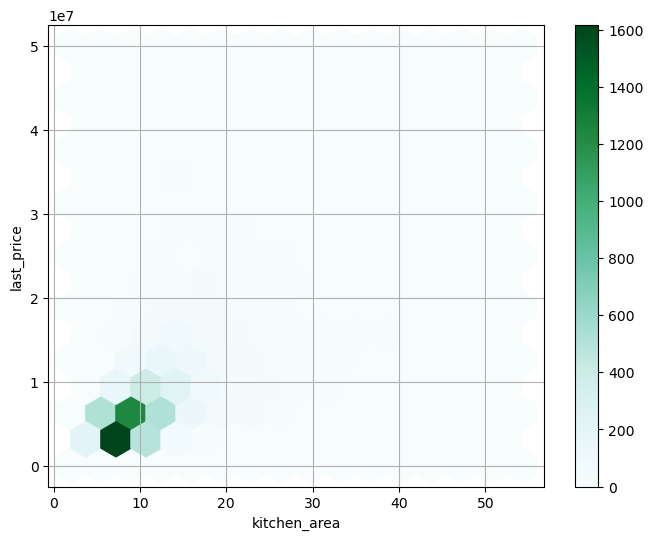

In [100]:
# building a graph to show the correlation between kitchen area and apartment price

data.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [101]:
# looking at the Pearson correlation coefficient

data['kitchen_area'].corr(data['last_price'])

0.6041908571754372

The cost of an apartment depends even less on the size of the kitchen, but there is still a relationship because the kitchen area is included in the total area. Therefore, the larger the kitchen, the larger the total area and, consequently, the higher the apartment price.

#### Correlation between price and number of rooms

In [102]:
# building a pivot table with the number of rooms, the number of apartments in each category, and the average price for each group

price_vs_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])
price_vs_rooms.columns = ['Total number of apartments', 'Average price']
price_vs_rooms.sort_values(by='Average price', ascending=False)

,Total number of apartments,Average price
rooms,,
9,2,23125000.0
10,3,23000000.0
8,6,18200000.0
7,26,17900000.0
6,49,16650000.0
5,142,13950000.0
4,479,11000000.0
3,1985,7499000.0
2,2398,5600000.0


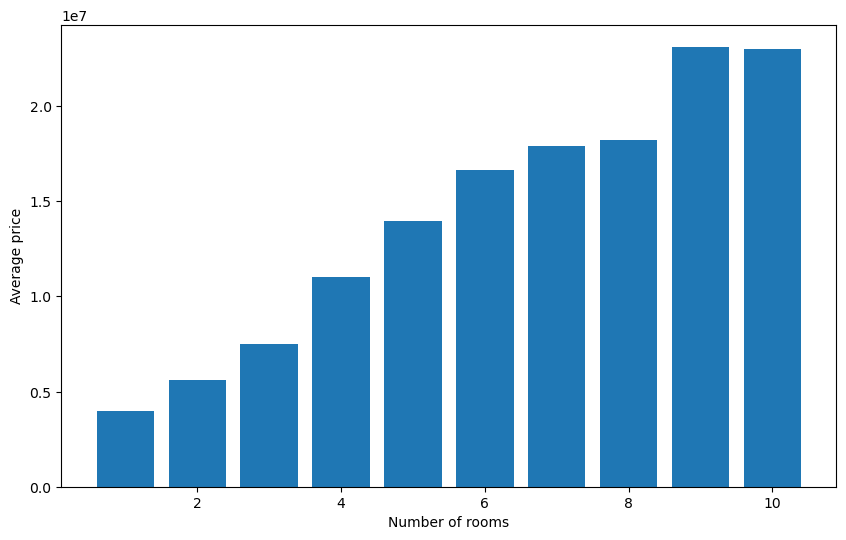

In [103]:
# building a graph to show the correlation between the number of rooms and apartment price
plt.figure(figsize=(10, 6))
plt.bar(price_vs_rooms.index, price_vs_rooms['Average price'])
plt.xlabel('Number of rooms')
plt.ylabel('Average price')
plt.show()

In [104]:
# looking at the Pearson correlation coefficient

data['rooms'].corr(data['last_price'])

0.5242941886902619

The more rooms, the higher the price. This, once again, comes down to the total area: more rooms mean more area.

#### Correlation between price and floor

In [105]:
# building a pivot table with the floor type, the number of apartments in each category, and the average price for each group

price_vs_floor = data.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'median'])
price_vs_floor.columns = ['Total number of apartments', 'Average price']
price_vs_floor.sort_values(by='Total number of apartments', ascending=False)

,Total number of apartments,Average price
floor_category,,
Another,5216,5950000.0
Last,1044,5800000.0
First,859,4900000.0


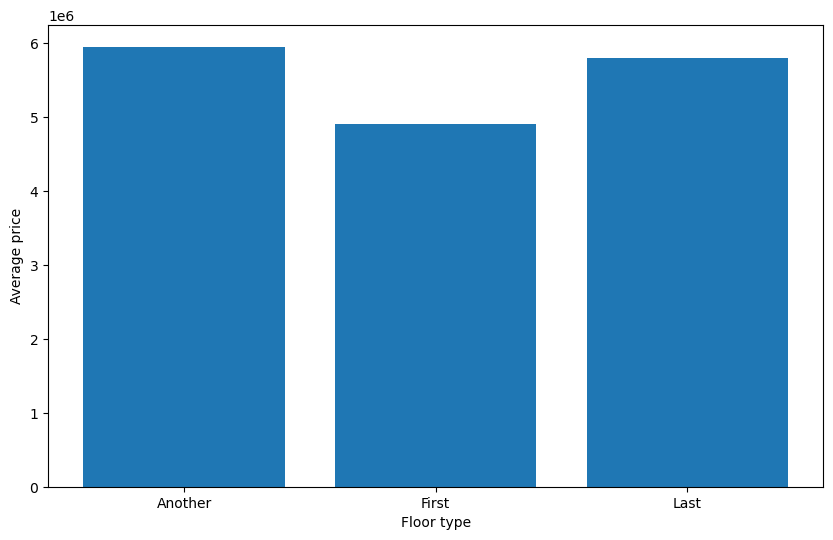

In [106]:
# building a graph to show the correlation between floor type and apartment price

plt.figure(figsize=(10, 6))
plt.bar(price_vs_floor.index, price_vs_floor['Average price'])
plt.xlabel('Floor type')
plt.ylabel('Average price')
plt.show()


The price does not depend much on the floor; the average price is roughly the same for any type of floor. However, apartments on the first floor are in the least demand.

#### Correlation between price and listing date

In [107]:
# building a pivot table with the publication date, the number of apartments in each category, and the average price for each group.

price_vs_weekday_exposition = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['count', 'median'])
price_vs_weekday_exposition.columns = ['Total number of apartments', 'Average price']
price_vs_weekday_exposition.sort_values(by='Total number of apartments', ascending=False)


,Total number of apartments,Average price
weekday_exposition,,
3,1297,5950000.0
1,1295,5690000.0
2,1213,5800000.0
4,1183,5700000.0
0,1094,5865000.0
5,554,5895000.0
6,483,5425000.0


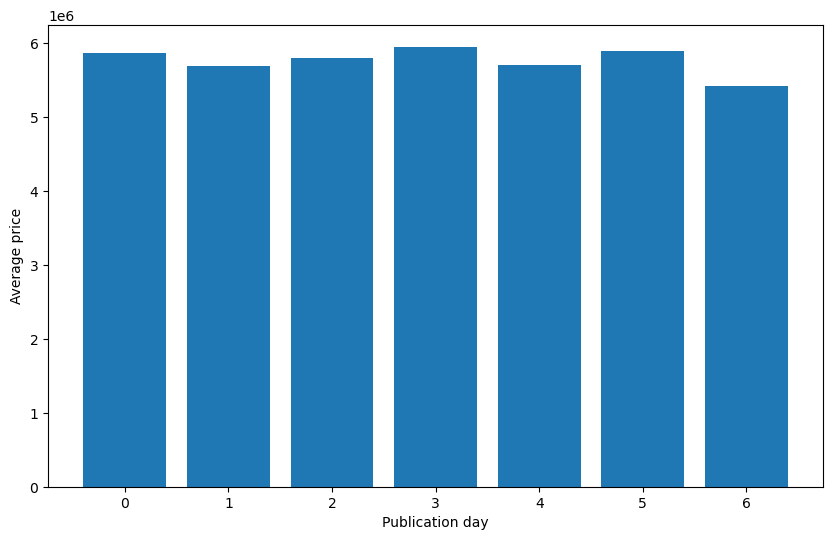

In [108]:
# creating a chart to show the correlation between the publication date and the apartment price

plt.figure(figsize=(10, 6))
plt.bar(price_vs_weekday_exposition.index, price_vs_weekday_exposition['Average price'])
plt.xlabel('Publication day')
plt.ylabel('Average price')
plt.show()

The price does not depend on the publication date.

In [109]:
# building a pivot table with the publication month, the number of apartments in each category, and the average price for each group

price_vs_month_exposition = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['count', 'median'])
price_vs_month_exposition.columns = ['Total number of apartments', 'Average price']
price_vs_month_exposition.sort_values(by='Total number of apartments', ascending=False)

,Total number of apartments,Average price
month_exposition,,
2,799,5600000.0
3,730,5785000.0
11,730,5725000.0
4,717,5800000.0
10,641,5500000.0
9,610,5999000.0
6,550,5500000.0
8,529,5700000.0
7,516,5940000.0


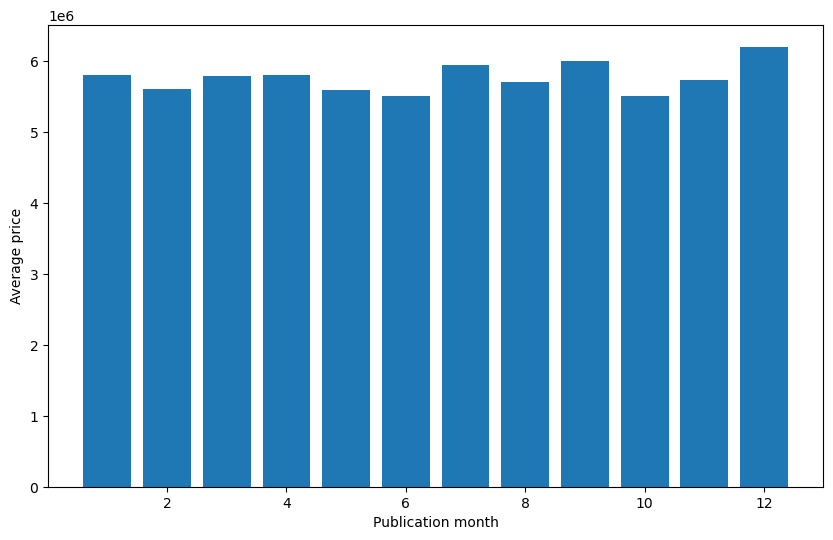

In [110]:
# creating a chart to show the correlation between the publication month and the apartment price

plt.figure(figsize=(10, 6))
plt.bar(price_vs_month_exposition.index, price_vs_month_exposition['Average price'])
plt.xlabel('Publication month')
plt.ylabel('Average price')
plt.show()

The price does not depend on the publication month.

In [111]:
# building a pivot table with the publication year, the number of apartments in each category, and the average price for each group

price_vs_year_exposition = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['count', 'median'])
price_vs_year_exposition.columns = ['Total number of apartments', 'Average price']
price_vs_year_exposition.sort_values(by='Total number of apartments', ascending=False)

,Total number of apartments,Average price
year_exposition,,
2017,2574,5500000.0
2018,2320,5790000.0
2016,903,5750000.0
2019,866,5900000.0
2015,394,6700000.0
2014,62,12298560.0


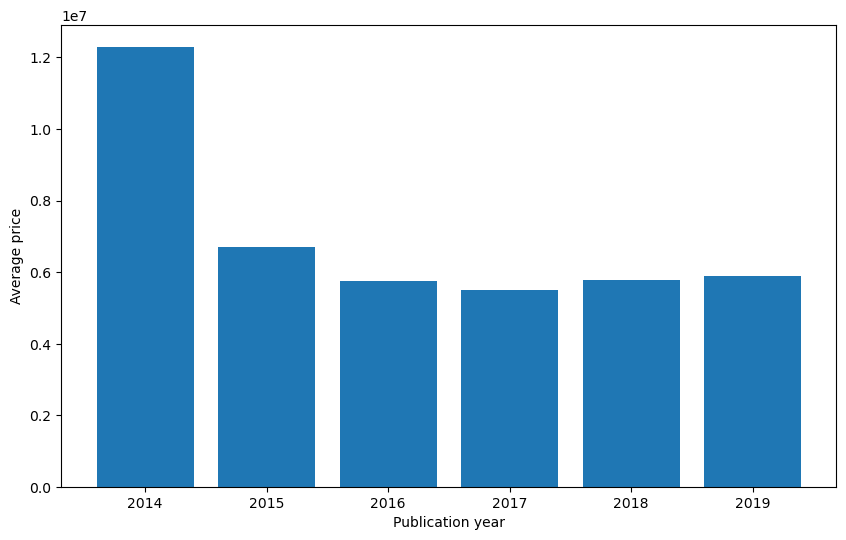

In [112]:
plt.figure(figsize=(10, 6))
plt.bar(price_vs_year_exposition.index, price_vs_year_exposition['Average price'])
plt.xlabel('Publication year')
plt.ylabel('Average price')
plt.show()

The highest average price was in 2014, and then the average price decreased. In 2019, there was a slight increase. However, there are too many specifics to understand what exactly influenced the price in a particular year. It is necessary to study socio-cultural factors.

### The average price per square meter in the 10 localities with the highest number of listings

In [113]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m_2,weekday_exposition,month_exposition,year_exposition,floor_category,city_center_km,last_price_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.37,3,3,2019,Another,16.0,C
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.71,3,8,2015,Another,14.0,D
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.00,1,6,2018,Another,8.0,D
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2,553.0,137.0,127525.25,3,11,2017,Another,14.0,D
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,3,298.0,366.0,82943.93,5,7,2017,Last,33.0,E


In [114]:
# building a pivot table with the name of the locality and the number of listings in each locality
locality_vs_exposition = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count')
locality_vs_exposition.columns = ['Number of listings']
locality_vs_exposition

,Number of listings
locality_name,
Зеленогорск,15
Колпино,126
Красное Село,39
Кронштадт,82
Ломоносов,10
Павловск,24
Петергоф,135
Пушкин,192
Санкт-Петербург,6403


In [115]:
# building a pivot table with the name of the locality and the average price per square meter in that locality

locality_vs_price_for_m = data.pivot_table(index='locality_name', values='price_for_m_2', aggfunc='mean')
locality_vs_price_for_m.columns = ['Average price per square meter']
locality_vs_price_for_m


,Average price per square meter
locality_name,
Зеленогорск,106668.804000
Колпино,75572.331429
Красное Село,76184.903846
Кронштадт,79964.140122
Ломоносов,69093.190000
Павловск,91291.021250
Петергоф,84735.686074
Пушкин,104999.383594
Санкт-Петербург,116582.728376


In [116]:
# combining the two pivot tables by the name of the locality and filtering by the descending number of listings
locality_vs_price = locality_vs_exposition.merge(locality_vs_price_for_m, on='locality_name')
locality_vs_price = locality_vs_price.sort_values(by='Number of listings', ascending=False).head(10)
locality_vs_price

,Number of listings,Average price per square meter
locality_name,,
Санкт-Петербург,6403,116582.728376
Пушкин,192,104999.383594
Петергоф,135,84735.686074
Колпино,126,75572.331429
Кронштадт,82,79964.140122
Сестрорецк,66,107330.777121
Красное Село,39,76184.903846
Павловск,24,91291.021250
посёлок Стрельна,19,88299.521579


In [117]:
locality_vs_price.sort_values(by='Average price per square meter', ascending=False)

,Number of listings,Average price per square meter
locality_name,,
Санкт-Петербург,6403,116582.728376
Сестрорецк,66,107330.777121
Зеленогорск,15,106668.804000
Пушкин,192,104999.383594
Павловск,24,91291.021250
посёлок Стрельна,19,88299.521579
Петергоф,135,84735.686074
Кронштадт,82,79964.140122
Красное Село,39,76184.903846


The highest price per square meter is in Saint Petersburg.

In [118]:
locality_vs_price.sort_values(by='Average price per square meter')

,Number of listings,Average price per square meter
locality_name,,
Колпино,126,75572.331429
Красное Село,39,76184.903846
Кронштадт,82,79964.140122
Петергоф,135,84735.686074
посёлок Стрельна,19,88299.521579
Павловск,24,91291.021250
Пушкин,192,104999.383594
Зеленогорск,15,106668.804000
Сестрорецк,66,107330.777121


The lowest price per square meter is in the city of Kolpino.

### Correlation between price and proximity to the city center

In [119]:

# creating a slice with apartments in Saint Petersburg
flats_in_spb = data.query('locality_name == "Санкт-Петербург"')

# creating a pivot table grouped by kilometers from the city center and the average price per kilometer
price_for_km = flats_in_spb.pivot_table(index='city_center_km', values='last_price', aggfunc='mean')

price_for_km.columns = ['Average price per kilometer']
price_for_km


,Average price per kilometer
city_center_km,
0.0,2.031908e+07
1.0,1.345427e+07
2.0,1.241277e+07
3.0,9.950720e+06
4.0,1.126597e+07
5.0,1.144740e+07
6.0,1.294580e+07
7.0,1.198138e+07
8.0,9.741893e+06


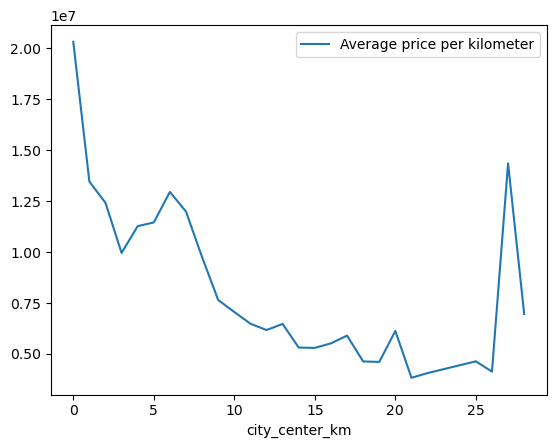

In [120]:
# creating a simple chart to show the correlation between the price per kilometer and the distance from the city center

price_for_km.plot()
plt.show()

The closer to the center, the more expensive the apartments. Possibly, beyond 5 km from the center, there are residential areas, which is why the price starts to rise again. There is also an unusual increase in price after 26 km. Perhaps another city begins there, which is why the price becomes higher.

## Overall conclusion

- Most apartments sold have a total area of 30 to 50 m², and 60 m². Many apartments have a living area of 15-20 m², as well as 25-50 m². Typically, the kitchen area in sold apartments ranges from 5 to 15 m².
- Most apartments were sold for less than 10,000,000. The majority of apartments cost less than 5,000,000.
- The most sold apartments are one-bedroom and two-bedroom units. One-bedroom units may also include studios. There are also three-bedroom units, but anything beyond that is much rarer.
- Typically, selling an apartment takes about 4 to 6 months. Some sales can stretch to a year. Unusually long sales take more than two years. Quick sales were completed in less than a month. Most apartments were sold in two months.
- The larger the total area, the higher the cost of the apartment. The cost of the apartment is slightly less dependent on the living area and kitchen size, but the dependence is still quite strong. The larger the living area and kitchen size, the more expensive the apartment.
- The more rooms, the higher the price. This again ties into the total area: more rooms, more area.
- The closer to the center, the more expensive the apartments. Possibly, beyond 5 km from the center, there are residential areas, which is why the price starts to rise again. There is also an unusual increase in price after 26 km. Perhaps another city begins there, which is why the price becomes higher.
- The price does not depend on the floor and the listing date. However, the highest average price was in 2014, and then the average price decreased. In 2019, there was a slight increase. There are too many specifics to understand what exactly influenced the price in a particular year. It is necessary to study socio-cultural factors.
- The highest price per square meter is in Saint Petersburg, and the lowest is in the city of Kolpino.
- It is necessary to make the values of the living area, kitchen area, and geotags mandatory to fill in. The area and location of the apartment have the most influence on the price.
- To avoid implicit duplicates in the future, an auto-fill feature can be added to the field with the name of the locality. The system will suggest the name of the locality based on the first letters.